In [25]:
import os
os.chdir('/Users/ntevensguyen/z_jupyter_data')

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

## Data Observation

In [42]:
df.shape
# 374 Rows and 13 Columns

(374, 13)

In [29]:
df.sample(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
364,365,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
205,206,Male,43,Engineer,7.7,8,90,5,Normal,130/85,70,8000,NaN
152,153,Male,39,Lawyer,7.2,8,60,5,Normal,130/85,68,8000,NaN
242,243,Male,44,Salesperson,6.4,6,45,7,Overweight,130/85,72,6000,Insomnia


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [31]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [33]:
df.drop(columns=['Person ID'],inplace=True)
df.head(3)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


In [44]:
df['Sleep Disorder']=df['Sleep Disorder'].fillna('None')
print(df['Sleep Disorder'].value_counts())

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


### Observation : 
In the sleep disorder column there are 78 people with sleep apnea and 77 with Insomnia, 219 people have no sleep disorder

## EDA 

In [35]:
numerical_cols=df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols=df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:",numerical_cols)
print("Categorical Columns:",categorical_cols)


Numerical Columns: ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
Categorical Columns: ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']


### Plot for numerical columns value

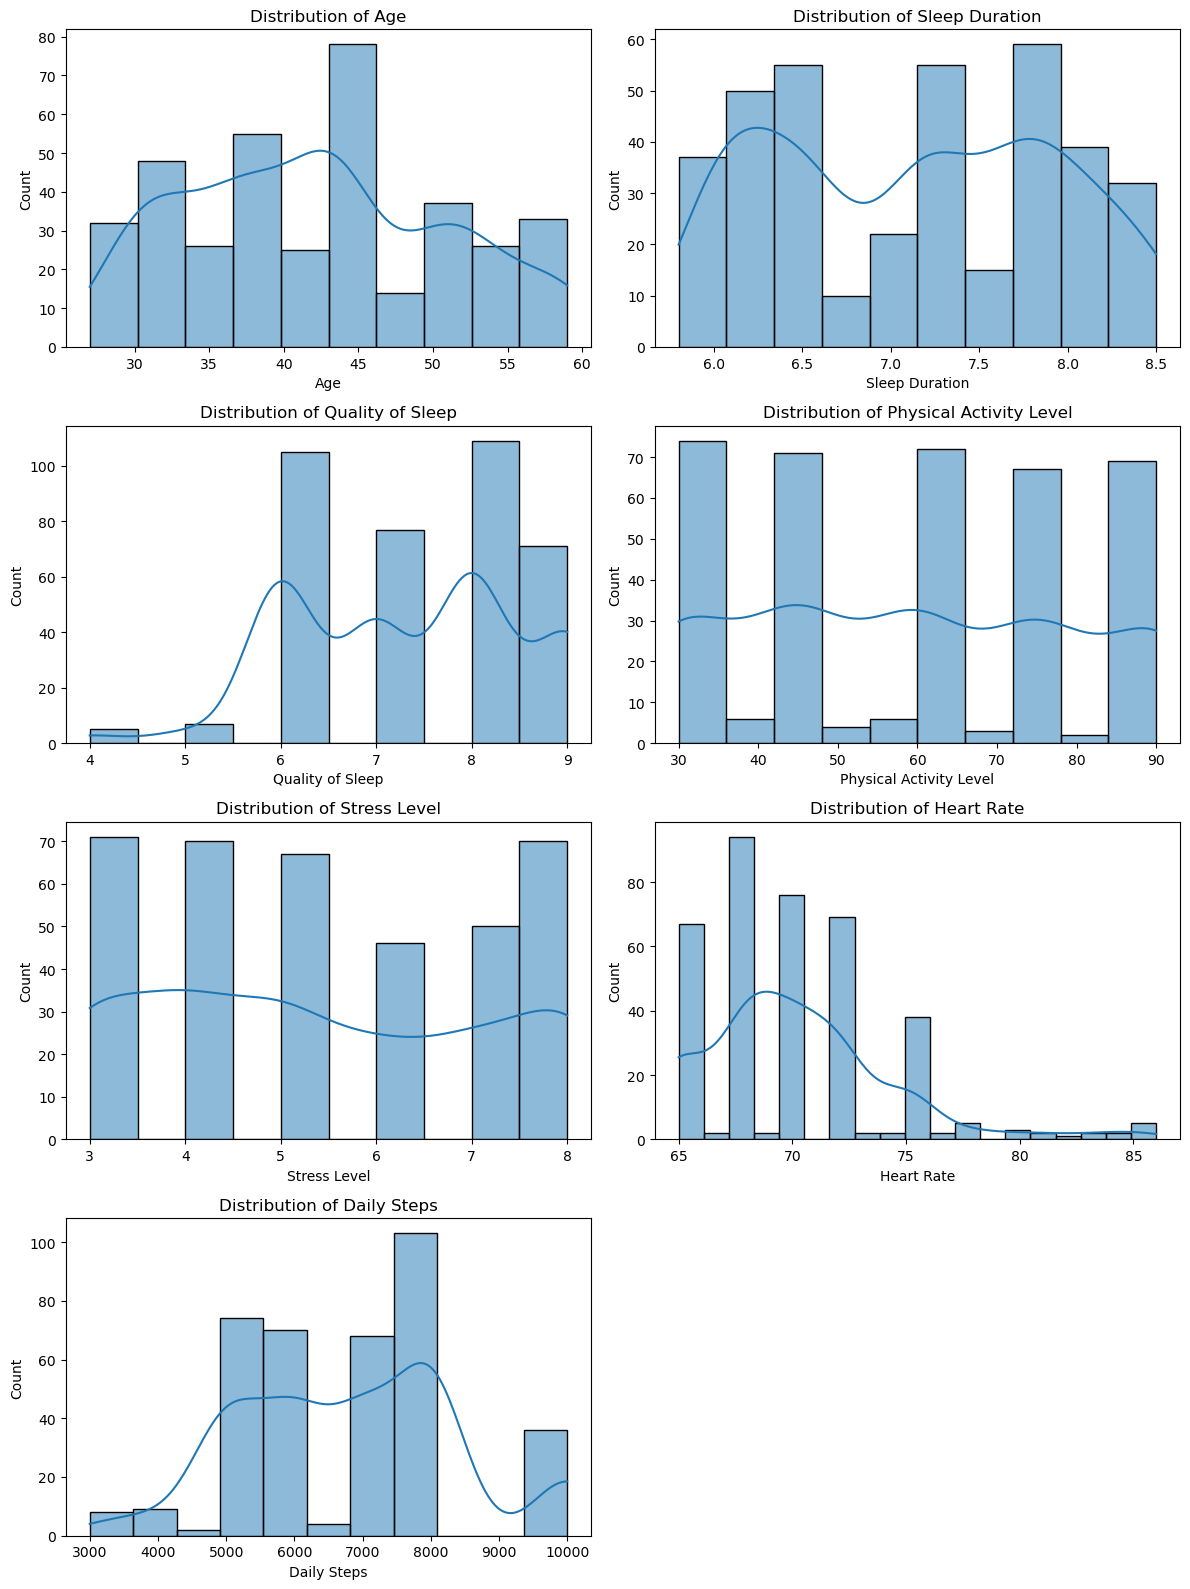

In [36]:
numeric_cols=['Age','Sleep Duration','Quality of Sleep','Physical Activity Level',\
                'Stress Level','Heart Rate','Daily Steps']

n_cols=2
n_rows=(len(numeric_cols)+1)//n_cols 


fig,axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


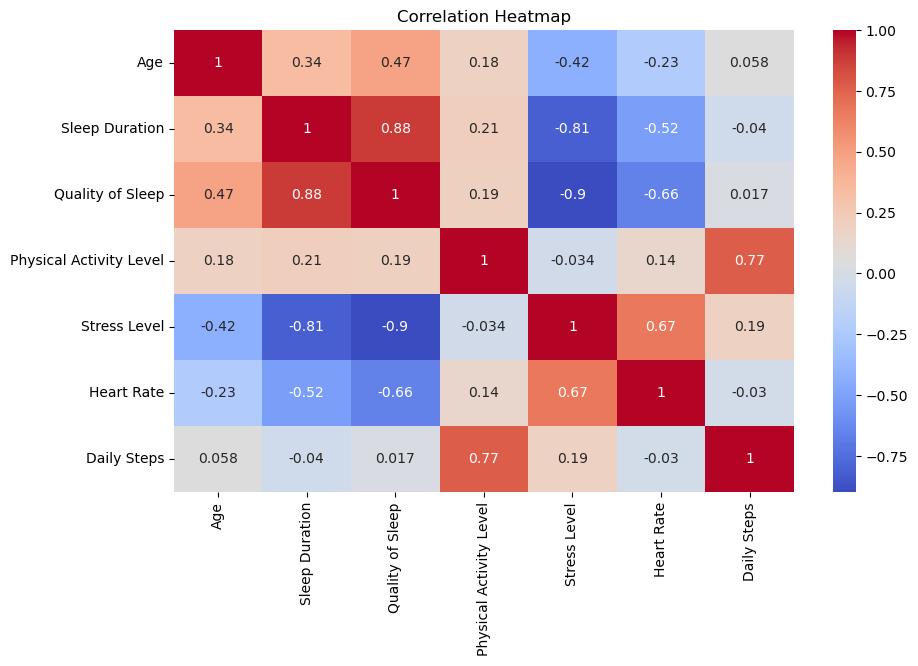

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Plot for categorical columns values

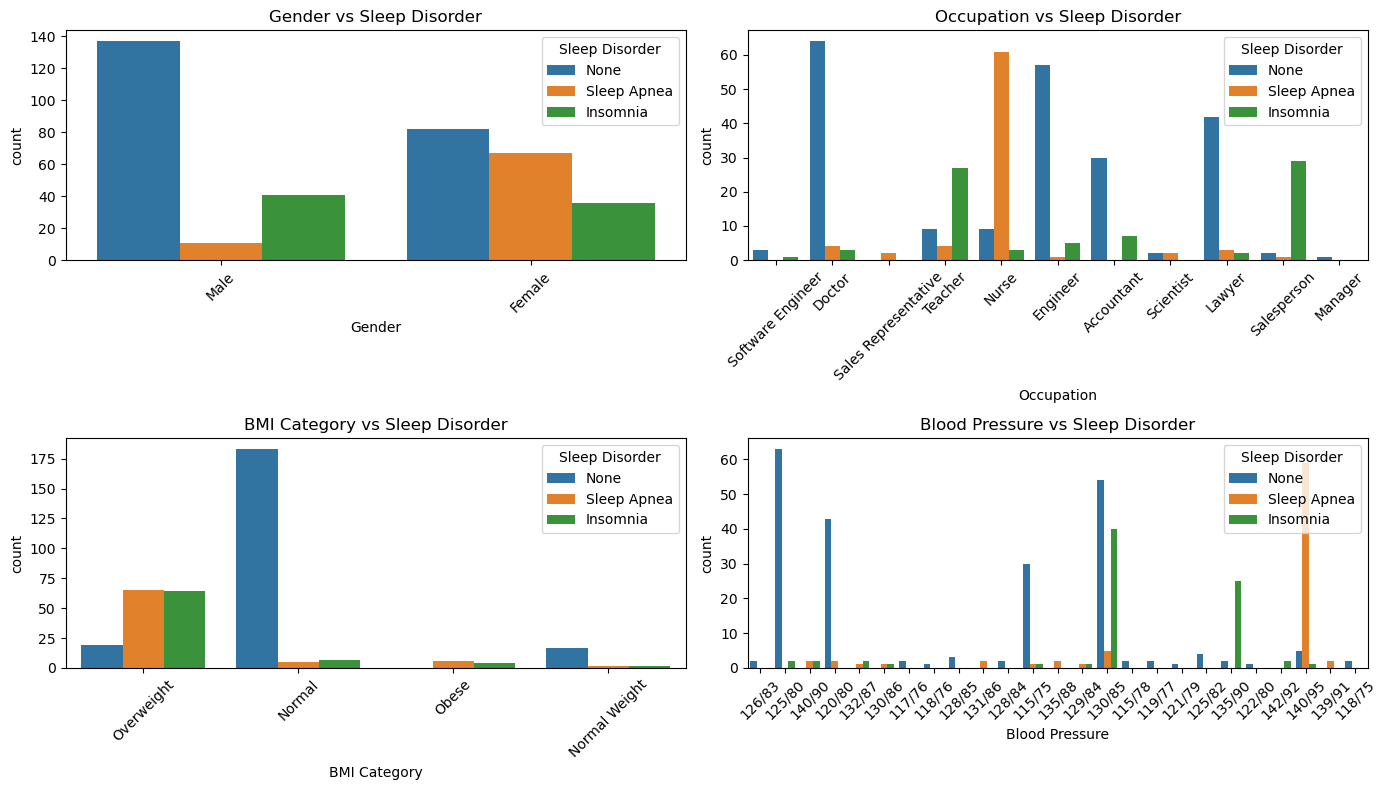

In [46]:
categorical_cols=['Gender','Occupation','BMI Category','Blood Pressure']
n_cols=2
n_rows=(len(categorical_cols)+1)//n_cols

fig,axes=plt.subplots(n_rows,n_cols,figsize=(14,n_rows*4))
axes=axes.flatten()

for i,col in enumerate(categorical_cols):
    sns.countplot(data=df,x=col,hue='Sleep Disorder',ax=axes[i])
    axes[i].set_title(f'{col} vs Sleep Disorder')
    axes[i].tick_params(axis='x',rotation=45)

for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Observation : 
1) Based on gender, women appear to experience sleep disorders more frequently than men.
2) Based on BMI category, those who have 'normal' weight tend to not have a sleep disorder.

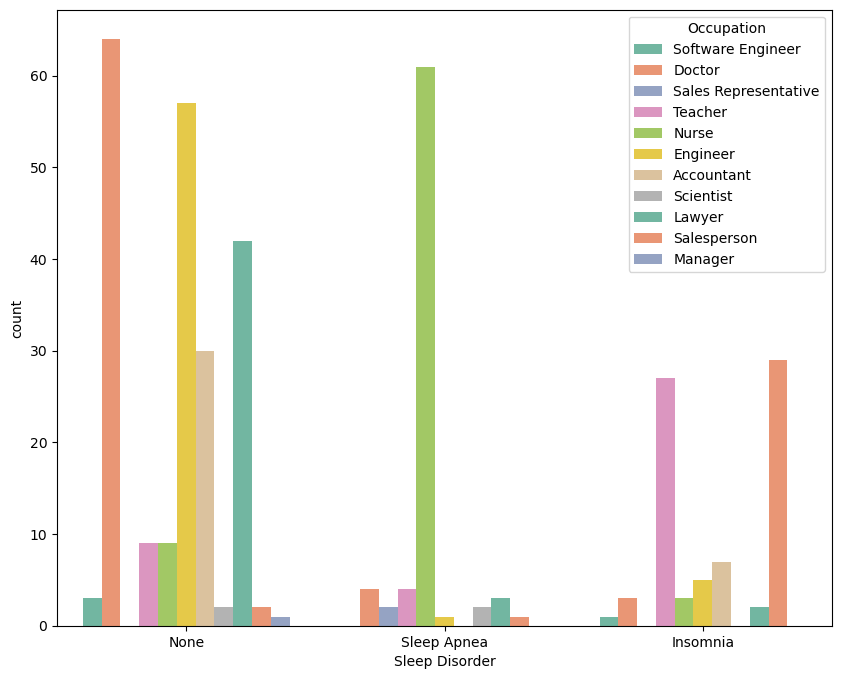

In [39]:
plt.figure(figsize=(10,8))
sns.countplot(hue="Occupation",x="Sleep Disorder",data=df,palette="Set2")
plt.show() 

In [40]:
df.groupby('Occupation')[['Quality of Sleep','Stress Level']].mean().sort_values('Stress Level',ascending=False)

,Quality of Sleep,Stress Level
Occupation,,
Sales Representative,4.000000,8.000000
Salesperson,6.000000,7.000000
Scientist,5.000000,7.000000
Doctor,6.647887,6.732394
Software Engineer,6.500000,6.000000
Nurse,7.369863,5.547945
Lawyer,7.893617,5.063830
Manager,7.000000,5.000000
Accountant,7.891892,4.594595


## Observation:

Jobs that involve constant pressure or fast paced decision making, like sales and scientific research, are linked with noticeably poorer sleep quality. People in these roles may be dealing with unpredictable schedules, heavy workloads, or mentally draining tasks that make it harder to maintain healthy sleep habits. On the other hand, fields like engineering, accounting, and law show clearer patterns of better sleep, possibly because the work is more structured and the stress is easier to manage. Together, the trend suggests that the type of stress someone faces at work can shape the quality of their sleep in a meaningful way.